In [1]:
import pandas as pd

df = pd.read_excel('/Users/marcos/Desktop/data-analysis-homework/pset3/online_retail_II.xlsx')

In [5]:
df['TotalAmount'] = df['Quantity'] * df['Price']

rfm_table = df.groupby('Customer ID').agg({
    'TotalAmount': 'sum',
    'Quantity': 'count',
    'InvoiceDate': 'max'
}).rename(columns={'Quantity': 'Frequency', 'InvoiceDate': 'LastPurchase', 'TotalAmount': 'Monetary'})

rfm_table

,Monetary,Frequency,LastPurchase
Customer ID,,,
12346.0,-64.68,46,2010-10-04 16:33:00
12347.0,1323.32,71,2010-12-07 14:57:00
12348.0,222.16,20,2010-09-27 14:59:00
12349.0,2646.99,107,2010-10-28 08:23:00
12351.0,300.93,21,2010-11-29 15:23:00
...,...,...,...
18283.0,641.77,230,2010-11-22 15:30:00
18284.0,436.68,29,2010-10-06 12:31:00
18285.0,427.00,12,2010-02-17 10:24:00


In [7]:
rfm_table['LastPurchase'] = (pd.to_datetime('today') - rfm_table['LastPurchase']).dt.days

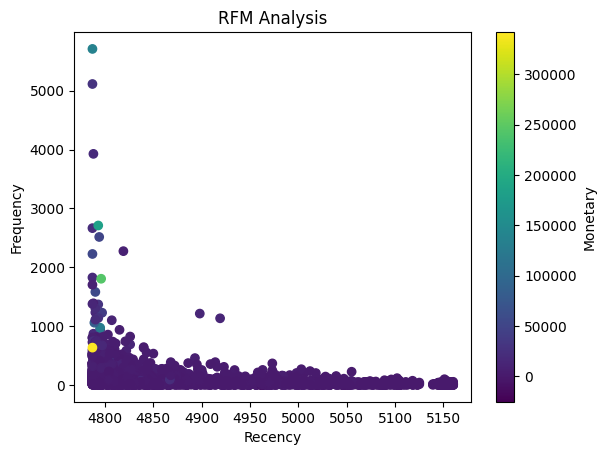

In [8]:
import matplotlib.pyplot as plt

plt.scatter(rfm_table['LastPurchase'], rfm_table['Frequency'], c=rfm_table['Monetary'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.title('RFM Analysis')
plt.colorbar(label='Monetary')
plt.show()

From this scatter graph we can see the profile of our customers. The more recent the last purchase, the more frequent the customer is and the more money he/she spends. The more distant the last purchase, the less frequent the customer is and the less money he/she spends. With this information we could proceed with the targeted marketing strategies now knowing that our customer that are better for our company are the ones that have a frequency higher than 500 and have recently bought something